<a href="https://colab.research.google.com/github/Priyadarshini-yadav13/Time_Series/blob/main/RNN_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout

# Read Data

In [ ]:
# ✅ Step 2: Load Dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

In [ ]:
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


# Summarize the Dataset

In [ ]:
df.shape

(144, 1)

In [ ]:
df.dtypes

,0
Passengers,int64


# Performing EDA

In [ ]:
df.isnull().sum()

,0
Passengers,0


# Plot Your Data

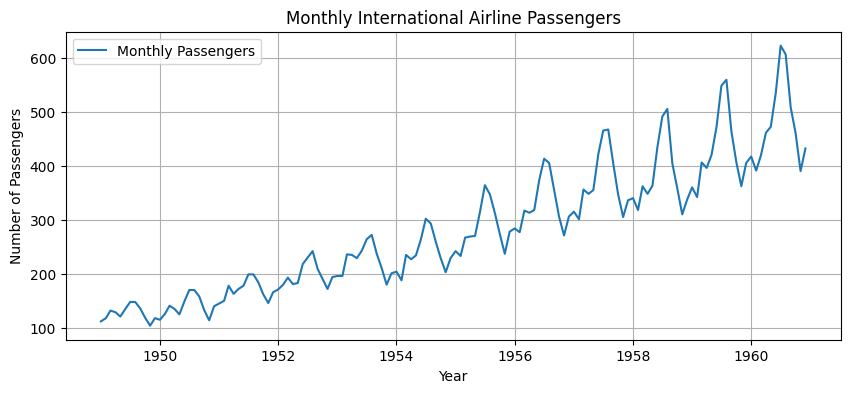

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(df, label='Monthly Passengers')
plt.title("Monthly International Airline Passengers")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.grid()
plt.legend()
plt.show()

# Scale Dataset

In [ ]:
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
data = df.values
sc = MinMaxScaler(feature_range=(0, 1))
scaled_data = sc.fit_transform(data)

In [ ]:
scaled_data

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

# Prepare Train/Test Split

In [ ]:
# [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

In [ ]:
# 1,2,3,4,5,6,7,8,9,10,11,12 - 13
# 2,3,4,5,6,7,8,9,10,11,12,13 - 14
# 3,4,5,6,7,8,9,10,11,12,13,14 - 15
# 4,5,6,7,8,9,10,11,12,13,14,15 - 16

In [ ]:
# [13,14,15,16,17,18,19,20,21,22,23,24]

In [ ]:
# Last 24 months for generating 12 input → 12 output sequences
test_data = scaled_data[-24:]
X_test, y_test = [], []

for i in range(12, 24):
    X_test.append(test_data[i-12:i, 0])
    y_test.append(test_data[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
X_test[0], y_test[0]

(array([[0.49420849],
        [0.45945946],
        [0.58301158],
        [0.56370656],
        [0.61003861],
        [0.71042471],
        [0.85714286],
        [0.87837838],
        [0.69305019],
        [0.58494208],
        [0.4980695 ],
        [0.58108108]]),
 np.float64(0.6042471042471043))

In [ ]:
X_test[1], y_test[1]

(array([[0.45945946],
        [0.58301158],
        [0.56370656],
        [0.61003861],
        [0.71042471],
        [0.85714286],
        [0.87837838],
        [0.69305019],
        [0.58494208],
        [0.4980695 ],
        [0.58108108],
        [0.6042471 ]]),
 np.float64(0.5540540540540541))

In [ ]:
# 0-11 - 12
# 1-12 - 13
# 2-13 - 14
# 3-14 - 15
# 4-15 - 16

In [ ]:
# Train data = all before last 12 months
train_data = scaled_data[:-12]
X_train, y_train = [], []

for i in range(12, len(train_data)):
    X_train.append(train_data[i-12:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train[0], y_train[0]

(array([[0.01544402],
        [0.02702703],
        [0.05405405],
        [0.04826255],
        [0.03281853],
        [0.05984556],
        [0.08494208],
        [0.08494208],
        [0.06177606],
        [0.02895753],
        [0.        ],
        [0.02702703]]),
 np.float64(0.02123552123552122))

In [ ]:
X_train[1], y_train[1]

(array([[0.02702703],
        [0.05405405],
        [0.04826255],
        [0.03281853],
        [0.05984556],
        [0.08494208],
        [0.08494208],
        [0.06177606],
        [0.02895753],
        [0.        ],
        [0.02702703],
        [0.02123552]]),
 np.float64(0.04247104247104247))

# Build and Train the RNN Model

In [ ]:
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(12, 1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 12, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,701 (30.08 KB)

 Trainable params: 7,701 (30.08 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 1.2352
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3533
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1232
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1178
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1182
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0621
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0772
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0491
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0583 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0359
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0382 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0388
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0342
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0276
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0287
Epoch 16/100
4/4 

# Predict the Last 12 Months (Test Set)

In [ ]:
X_test

array([[[0.49420849],
        [0.45945946],
        [0.58301158],
        [0.56370656],
        [0.61003861],
        [0.71042471],
        [0.85714286],
        [0.87837838],
        [0.69305019],
        [0.58494208],
        [0.4980695 ],
        [0.58108108]],

       [[0.45945946],
        [0.58301158],
        [0.56370656],
        [0.61003861],
        [0.71042471],
        [0.85714286],
        [0.87837838],
        [0.69305019],
        [0.58494208],
        [0.4980695 ],
        [0.58108108],
        [0.6042471 ]],

       [[0.58301158],
        [0.56370656],
        [0.61003861],
        [0.71042471],
        [0.85714286],
        [0.87837838],
        [0.69305019],
        [0.58494208],
        [0.4980695 ],
        [0.58108108],
        [0.6042471 ],
        [0.55405405]],

       [[0.56370656],
        [0.61003861],
        [0.71042471],
        [0.85714286],
        [0.87837838],
        [0.69305019],
        [0.58494208],
        [0.4980695 ],
        [0.58108108],
    

In [ ]:
predicted_test_scaled = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


In [ ]:
predicted_test_scaled

array([[0.5264692 ],
       [0.51419115],
       [0.6033412 ],
       [0.59234655],
       [0.6687137 ],
       [0.7473586 ],
       [0.844829  ],
       [0.8768589 ],
       [0.74026066],
       [0.6379637 ],
       [0.5654016 ],
       [0.61323005]], dtype=float32)

In [ ]:
predicted_test = sc.inverse_transform(predicted_test_scaled)

In [ ]:
predicted_test

array([[376.71103],
       [370.35104],
       [416.53076],
       [410.8355 ],
       [450.3937 ],
       [491.13177],
       [541.62146],
       [558.2129 ],
       [487.45505],
       [434.4652 ],
       [396.87805],
       [421.65317]], dtype=float32)

In [ ]:
y_test

array([0.6042471 , 0.55405405, 0.60810811, 0.68918919, 0.71042471,
       0.83204633, 1.        , 0.96911197, 0.77992278, 0.68918919,
       0.55212355, 0.63320463])

In [ ]:
# Inverse scale real test values
real_test = sc.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
real_test

array([[417.],
       [391.],
       [419.],
       [461.],
       [472.],
       [535.],
       [622.],
       [606.],
       [508.],
       [461.],
       [390.],
       [432.]])

# Plot Real vs Predicted Values

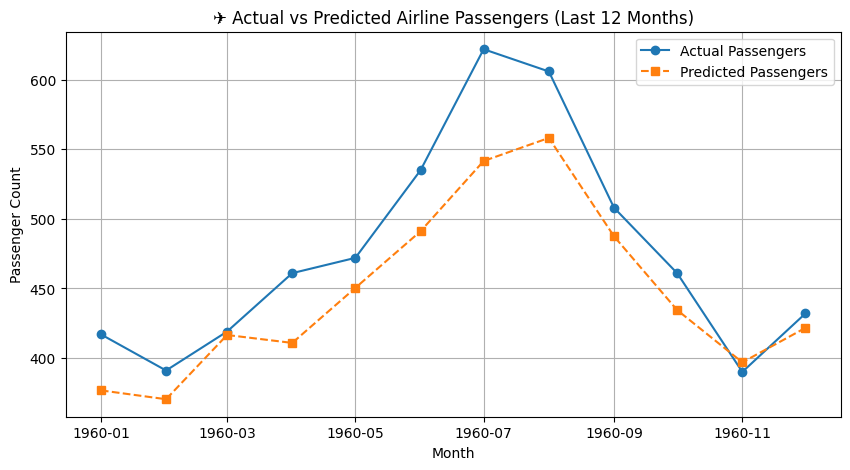

In [ ]:
test_dates = df.index[-12:]

plt.figure(figsize=(10, 5))
plt.plot(test_dates, real_test, marker='o', label='Actual Passengers')
plt.plot(test_dates, predicted_test, marker='s', linestyle='--', label='Predicted Passengers')
plt.title("✈️ Actual vs Predicted Airline Passengers (Last 12 Months)")
plt.xlabel("Month")
plt.ylabel("Passenger Count")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
import math

# ✅ Calculate RMSE
rmse = math.sqrt(mean_squared_error(real_test, predicted_test))
print("RMSE on Test Set (Last 12 Months):", rmse)

RMSE on Test Set (Last 12 Months): 37.62565504467911


# Predict the Next 12 Months (Future Forecast)

In [ ]:
# Use the last 12 months of the entire dataset as input
last_sequence = scaled_data[-12:].reshape(1, 12, 1)

print(last_sequence)


future_predictions_scaled = []

c = 1
for _ in range(12):  # Predict next 12 months
    print('Month : ', c)
    print('last_sequence')
    print(last_sequence)
    next_pred_scaled = model.predict(last_sequence)[0, 0]
    print('next_pred_scaled')
    print(next_pred_scaled)
    future_predictions_scaled.append(next_pred_scaled)
    print('future_predictions_scaled')
    print(future_predictions_scaled)

    # Update input sequence
    new_input = np.append(last_sequence[0, 1:, 0], next_pred_scaled)
    print('new_input')
    print(new_input)
    last_sequence = new_input.reshape(1, 12, 1)
    print('last_sequence')
    print(last_sequence)
    c = c+1

# Inverse scale the future predictions
future_predictions = sc.inverse_transform(np.array(future_predictions_scaled).reshape(-1, 1))

[[[0.6042471 ]
  [0.55405405]
  [0.60810811]
  [0.68918919]
  [0.71042471]
  [0.83204633]
  [1.        ]
  [0.96911197]
  [0.77992278]
  [0.68918919]
  [0.55212355]
  [0.63320463]]]
Month :  1
last_sequence
[[[0.6042471 ]
  [0.55405405]
  [0.60810811]
  [0.68918919]
  [0.71042471]
  [0.83204633]
  [1.        ]
  [0.96911197]
  [0.77992278]
  [0.68918919]
  [0.55212355]
  [0.63320463]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
next_pred_scaled
0.58958495
future_predictions_scaled
[np.float32(0.58958495)]
new_input
[0.55405405 0.60810811 0.68918919 0.71042471 0.83204633 1.
 0.96911197 0.77992278 0.68918919 0.55212355 0.63320463 0.58958495]
last_sequence
[[[0.55405405]
  [0.60810811]
  [0.68918919]
  [0.71042471]
  [0.83204633]
  [1.        ]
  [0.96911197]
  [0.77992278]
  [0.68918919]
  [0.55212355]
  [0.63320463]
  [0.58958495]]]
Month :  2
last_sequence
[[[0.55405405]
  [0.60810811]
  [0.68918919]
  [0.71042471]
  [0.83204633]
  [1.        ]
  [0.96911197]
  [0.77992278]
  [0.68918919]
 

In [ ]:
# Use the last 12 months of the entire dataset as input
last_sequence = scaled_data[-12:].reshape(1, 12, 1)

# print(last_sequence)

future_predictions_scaled = []

for _ in range(12):  # Predict next 12 months
    next_pred_scaled = model.predict(last_sequence)[0, 0]
    future_predictions_scaled.append(next_pred_scaled)

    # Update input sequence
    new_input = np.append(last_sequence[0, 1:, 0], next_pred_scaled)
    last_sequence = new_input.reshape(1, 12, 1)

# Inverse scale the future predictions
future_predictions = sc.inverse_transform(np.array(future_predictions_scaled).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [ ]:
future_predictions

array([[429.58118],
       [398.5156 ],
       [409.57907],
       [435.85577],
       [474.6893 ],
       [520.2378 ],
       [595.42676],
       [585.1128 ],
       [527.1404 ],
       [468.44177],
       [414.5456 ],
       [433.13586]], dtype=float32)

# Plot Original + Future 12 Month Predictions

In [ ]:
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')

In [ ]:
future_dates

DatetimeIndex(['1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01',
               '1961-05-01', '1961-06-01', '1961-07-01', '1961-08-01',
               '1961-09-01', '1961-10-01', '1961-11-01', '1961-12-01'],
              dtype='datetime64[ns]', freq='MS')

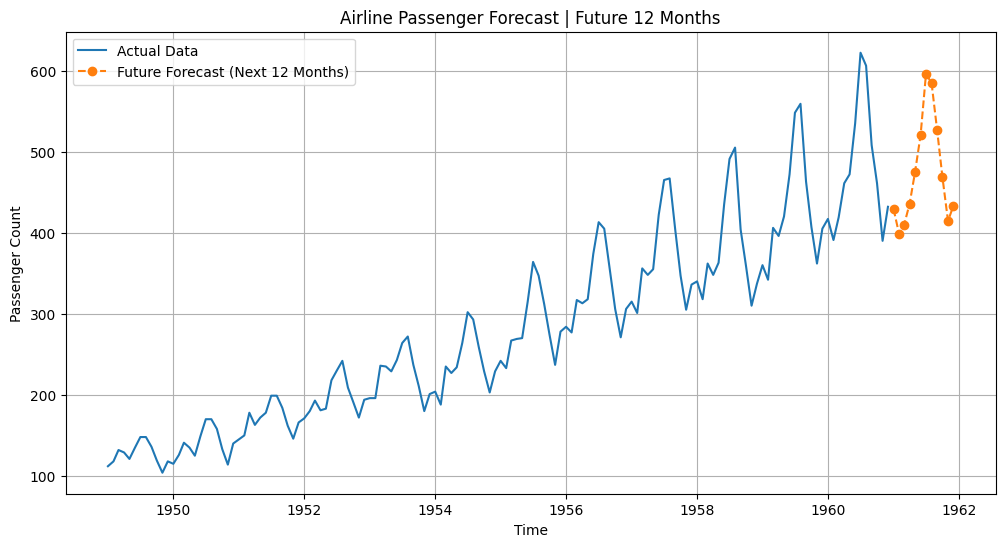

In [ ]:
# Create future date index (after last date in dataset)
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')

# Plot full data + future
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Passengers'], label='Actual Data')
plt.plot(future_dates, future_predictions, label='Future Forecast (Next 12 Months)', linestyle='--', marker='o')
plt.title("Airline Passenger Forecast | Future 12 Months")
plt.xlabel("Time")
plt.ylabel("Passenger Count")
plt.grid(True)
plt.legend()
plt.show()